Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (4).csv
dict_keys(['1. Predict Loan Default (4).csv'])
File being loaded: 1. Predict Loan Default (4).csv
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      3572
           1       0.45      0.03      0.06       428

    accuracy                           0.89      4000
   macro avg       0.67      0.51      0.50      4000
weighted avg       0.85      0.89      0.85      4000

Accuracy: 0.89225
Precision: 0.45161290322580644
Recall: 0.03271028037383177


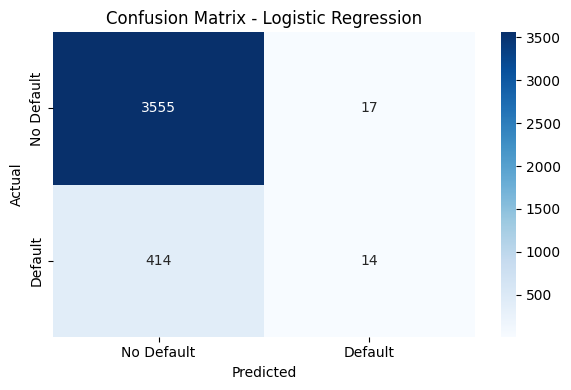

['loan_default_model.pkl']

In [10]:
# --- Step 1: Upload CSV file ---
from google.colab import files
uploaded = files.upload()

# --- Step 2: Check uploaded files ---
print(uploaded.keys())  # This will print the file name(s) of the uploaded files

# --- Step 3: Load into pandas ---
import io
import pandas as pd

# Ensure the correct filename is selected based on the uploaded files
file_name = list(uploaded.keys())[0]  # This will pick the first uploaded file
print(f"File being loaded: {file_name}")  # Check which file is being used

# --- Step 4: Read the CSV file with proper encoding ---
loan_df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='utf-8')  # Add encoding if needed

# --- Step 5: Drop ID column ---
loan_df.drop(columns=["LoanID"], inplace=True)

# --- Step 6: Encode categorical columns ---
cat_cols = loan_df.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    loan_df[col] = le.fit_transform(loan_df[col])
    label_encoders[col] = le

# --- Step 7: Sample 20,000 rows to speed up ---
loan_sample = loan_df.sample(n=20000, random_state=42)

# --- Step 8: Define features and target ---
X = loan_sample.drop(columns=["Default"])
y = loan_sample["Default"]

# --- Step 9: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 10: Feature scaling ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 11: Train model ---
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# --- Step 12: Evaluate ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# --- Step 13: Print metrics ---
print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# --- Step 14: Confusion matrix heatmap ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Step 15: Save model (optional) ---
import joblib
joblib.dump(model, 'loan_default_model.pkl')  # Save the trained model for later use
